<a href="https://colab.research.google.com/github/ethanmacrae/load-shortfall-regression-predict-api/blob/master/Predict%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

##Introduction

As the global energy production shifts toward favouring the use of renewable energy sources, several issues have begun to arise. Renewable sources of energy are often impacted by weather conditions, which may lead to a shortfall of elecricity supply. As a result, it becomes imperative to predict these shortfall occurences as to allow for adequate preparation. This preparation often involves supplementing the electricity grid with standard fossil fuel sources. It is also incredibly important in our journey to further our understanding of renewable energy sources as a primary source of electricity as we move into a greener future. 

We have used data from Spains' electricity monitoring program, which tracks the shortfall between the energy generated by means of fossil fuels and various renewable sources with respect to weather conditions. We have sought to develop a prediction model which attempts to predict the shortfall of electricity (our target variable) based on the weather conditions provided in the dataset.  








### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

### Problem Statement

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we are importing all the relavant packages which will be used for analysis and modeling.

In [255]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Libraries for data preparation and model building

# Import the scaling module
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate 

# Import train/test split module
from sklearn.model_selection import train_test_split

#Modelling imports
import xgboost
from xgboost import XGBRegressor
from sklearn import metrics, decomposition, linear_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

<a id="two"></a>
## 2. Loading the Data


 Loading the data to be used for exploratory data snd model builing and analysis.


In [256]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanmacrae/load-shortfall-regression-predict-api/master/df_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/ethanmacrae/load-shortfall-regression-predict-api/master/df_test.csv")
pd.set_option('display.max_columns', None)
df.shape,df_test.shape

((8763, 49), (2920, 48))

In [257]:
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [258]:
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)


Data Preparation with Regression

This section provides an indepth EDA which allowed us to gain deeper insights into the dimensions and many features of our data. We also provide the code for imputations and cleaning - this was done before any analysis as to prevent missing data and data type clashes from hindering our analysis.  


In [259]:
# look at data statistics
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2466.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,2.518094,178.979452,24.255822,2.657192,0.047397,0.046164,0.0,1015.317123,0.000001,0.059863,0.000006,0.0,758.820101,760.473307,1016.709132,772.226294,1013.148351,291.589360,1016.240411,291.439216,291.377796,737.039079,290.746255,64.623916,291.317184,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,1.625507,86.976503,29.430257,1.788870,0.162474,0.193432,0.0,7.021445,0.000074,0.193218,0.000217,0.0,93.536025,98.009846,8.773784,75.727539,6.528997,7.521748,9.624074,7.055448,7.113243,106.129916,7.738131,18.355766,7.176955,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,988.333333,0.000000,0.000000,0.000000,0.0,262.500000,207.333333,975.000000,259.500000,973.000000,273.816667,943.000000,273.816667,273.816667,207.666667,272.350000,13.000000,273.816667,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,1.333333,113.333333,0.000000,1.333333,0.000000,0.000000,0.0,1012.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1013.333333,800.000000,1010.666667,286.150000,1013.666667,286.150000,285.816667,702.000000,285.356667,52.000000,285.816667,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,2.000000,176.666667,11.333333,2.333333,0.000000,0.000000,0.0,1016.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1017.666667,800.000000,1014.666667,290.483333,1017.333333,291.150000,291.150000,800.000000,289.540000,65.000000,291.150000,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,3.666667,253.333333,40.000000,3.666667,0.000000,0.000000,0.0,1019.333333,0.000000,0.000000,0.000000,0.0,800.666667,801.000000,1022.000000,800.333333,1017.666667,296.483333,1021.333333,297.150000,297.150000,802.000000,295.674167,79.333333,297.150000,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,2

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

The informations list the features and shows that we have 1 feature with Null values, and 2 features with data types objects, 1 integer and 44 with dtypes float.

In [261]:

all_data = [["Temperature","Wind speed","Humidity",'Dregrees','Rain','Clouds', 'Pressure','Weather_id', 'Y-Variable' ],
            ['Seville_temp_max',"Madrid_wind_speed",'Seville_humidity', 'Valencia_wind_deg','Bilbao_rain_1h','Bilbao_clouds_all', 'Seville_pressure','Madrid_weather_id', 'load_shortfall_3h' ],
            ['Seville_temp',"Valencia_wind_speed",'Madrid_humidity', 'Bilbao_wind_deg','Seville_rain_1h','Seville_clouds_all', 'Barcelona_pressure','Barcelona_weather_id'],
            ['Seville_temp_min',"Bilbao_wind_speed",'Valencia_humidity', 'Barcelona_wind_deg','Barcelona_rain_1h','Madrid_clouds_all', 'Bilbao_pressure','Seville_weather_id'],
            ['Valencia_temp_max',"Seville_wind_speed",'','','Madrid_rain_1h', '','Valencia_pressure','Bilbao_weather_id'],
            ['Valencia_temp','Barcelona_wind_speed','','', 'Bilbao_snow_3h','', 'Madrid_pressure'],

            ['Valencia_temp_min','','','','Seville_rain_3h'],
            ['Barcelona_temp_max','','','','Barcelona_rain_3h'],
            ['Barcelona_temp','','','','Valencia_snow_3h'],
            ['Barcelona_temp_min'],
            ['Madrid_temp_max'],
            ['Madrid_temp'],
            ['Madrid_temp_min'],
            ['Bilbao_temp_max'],
            ['Bilbao_temp'],
            ['Bilbao_temp_min']
         
            ]
print(tabulate(all_data,headers='firstrow',tablefmt='grid'))


+--------------------+----------------------+-------------------+--------------------+-------------------+--------------------+--------------------+----------------------+-------------------+
| Temperature        | Wind speed           | Humidity          | Dregrees           | Rain              | Clouds             | Pressure           | Weather_id           | Y-Variable        |
+====================+======================+===================+====================+===================+====================+====================+======================+===================+
| Seville_temp_max   | Madrid_wind_speed    | Seville_humidity  | Valencia_wind_deg  | Bilbao_rain_1h    | Bilbao_clouds_all  | Seville_pressure   | Madrid_weather_id    | load_shortfall_3h |
+--------------------+----------------------+-------------------+--------------------+-------------------+--------------------+--------------------+----------------------+-------------------+
| Seville_temp       | Valencia_wind_spe

### Cleaning

In [262]:
### Convert time column to datetime
df['time']= pd.to_datetime(df['time'])
df_test['time']= pd.to_datetime(df_test['time'])

In [263]:
df['month'] = df['time'].dt.month
df_test['month'] = df_test['time'].dt.month

In [264]:
df = df.set_index('time')
df_test = df_test.set_index('time')

Checking Missing Values on Our Datasets

In [265]:
round((df.isnull().sum()/df.shape[0])
      *100,2).astype(str)+ ' %'

Unnamed: 0               0.0 %
Madrid_wind_speed        0.0 %
Valencia_wind_deg        0.0 %
Bilbao_rain_1h           0.0 %
Valencia_wind_speed      0.0 %
Seville_humidity         0.0 %
Madrid_humidity          0.0 %
Bilbao_clouds_all        0.0 %
Bilbao_wind_speed        0.0 %
Seville_clouds_all       0.0 %
Bilbao_wind_deg          0.0 %
Barcelona_wind_speed     0.0 %
Barcelona_wind_deg       0.0 %
Madrid_clouds_all        0.0 %
Seville_wind_speed       0.0 %
Barcelona_rain_1h        0.0 %
Seville_pressure         0.0 %
Seville_rain_1h          0.0 %
Bilbao_snow_3h           0.0 %
Barcelona_pressure       0.0 %
Seville_rain_3h          0.0 %
Madrid_rain_1h           0.0 %
Barcelona_rain_3h        0.0 %
Valencia_snow_3h         0.0 %
Madrid_weather_id        0.0 %
Barcelona_weather_id     0.0 %
Bilbao_pressure          0.0 %
Seville_weather_id       0.0 %
Valencia_pressure       23.6 %
Seville_temp_max         0.0 %
Madrid_pressure          0.0 %
Valencia_temp_max        0.0 %
Valencia

In [266]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Valencia_pressure,23.599224


We have missing values on Valencia_pressure which contributes 23% to the values of this specific features, since 23% is still reasonably low and according to research if a column contains less than 80% missing values, we should keep it hence we will not drop the column, however, we will fill it with values.

In [267]:
df.fillna(df.groupby(df.index.month).transform('mean'), inplace = True)
df_test.fillna(df_test.groupby(df_test.index.month).transform('mean'), inplace = True)

Drop Columns
We are Dropping the 'Unnamed columns since it does not add value and we have no metadat on the reason we have it on the datasets.

In [268]:
for col_name in df.columns:
    if df[col_name].dtypes == 'float64':
        unique_Val = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_Val} unique values".format(col_name = col_name, unique_Val = unique_Val))

Feature 'Madrid_wind_speed' has 38 unique values
Feature 'Bilbao_rain_1h' has 20 unique values
Feature 'Valencia_wind_speed' has 58 unique values
Feature 'Seville_humidity' has 274 unique values
Feature 'Madrid_humidity' has 280 unique values
Feature 'Bilbao_clouds_all' has 277 unique values
Feature 'Bilbao_wind_speed' has 39 unique values
Feature 'Seville_clouds_all' has 246 unique values
Feature 'Bilbao_wind_deg' has 1042 unique values
Feature 'Barcelona_wind_speed' has 39 unique values
Feature 'Barcelona_wind_deg' has 974 unique values
Feature 'Madrid_clouds_all' has 250 unique values
Feature 'Seville_wind_speed' has 38 unique values
Feature 'Barcelona_rain_1h' has 31 unique values
Feature 'Seville_rain_1h' has 17 unique values
Feature 'Bilbao_snow_3h' has 83 unique values
Feature 'Barcelona_pressure' has 189 unique values
Feature 'Seville_rain_3h' has 50 unique values
Feature 'Madrid_rain_1h' has 19 unique values
Feature 'Barcelona_rain_3h' has 77 unique values
Feature 'Valencia_sn

In [269]:
print(df['Seville_pressure'].value_counts().sort_values(ascending=False).head(25))

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp22    392
sp16    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64


In [270]:
#df[["Seville_pressure_1"]]*100

In [271]:
### Drop useless column

df.drop('Unnamed: 0', axis=1, inplace = True)
df_test.drop('Unnamed: 0', axis=1, inplace = True)

### Label Encoding Text Features

Label Encoding Variables with text
We encoding Variables with test to numeric values to enable fitting and testing of the specific features.

In [272]:
df["Valencia_wind_deg_1"] = LabelEncoder().fit_transform(df["Valencia_wind_deg"])
df["Seville_pressure_1"] = LabelEncoder().fit_transform(df["Seville_pressure"])

df_test["Valencia_wind_deg_1"] = LabelEncoder().fit_transform(df_test["Valencia_wind_deg"])
df_test["Seville_pressure_1"] = LabelEncoder().fit_transform(df_test["Seville_pressure"])
df.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,month,Valencia_wind_deg_1,Seville_pressure_1
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,5,17
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,17


### Exploratory Data Analysis


In [273]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.967521
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [274]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.709919
Seville_temp_max          -0.515989
Madrid_pressure            2

In [275]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,month,Valencia_wind_deg_1,Seville_pressure_1
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157583,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.237445,0.104954,-0.026246
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.203164,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,-0.188274,0.044209,-0.027683
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.053338,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.237156,0.204874,-0.010144
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.059663,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,-0.111622,0.141594,-0.056700
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.124726,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,-0.076567,0.171478,-0.070508
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.076527,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,-0.117452,0.074476,0.001263
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.041561,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.09

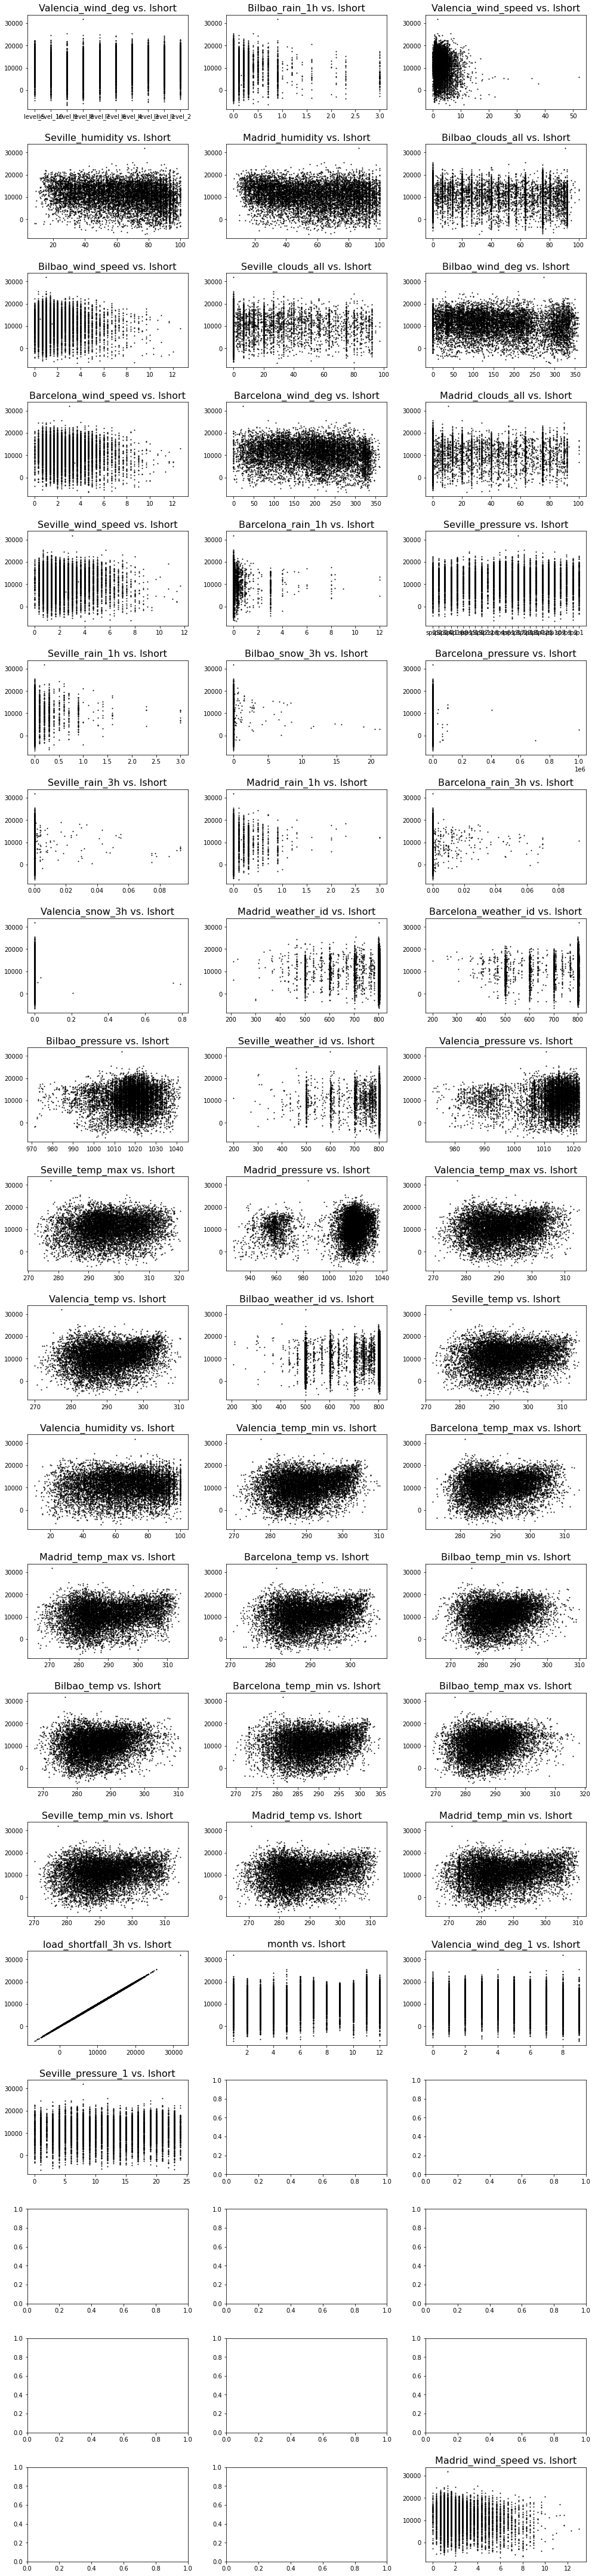

In [276]:
# plot relevant feature interactions
fig, axs = plt.subplots(20,3, figsize=(14,60),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. lshort".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'], s=1, color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

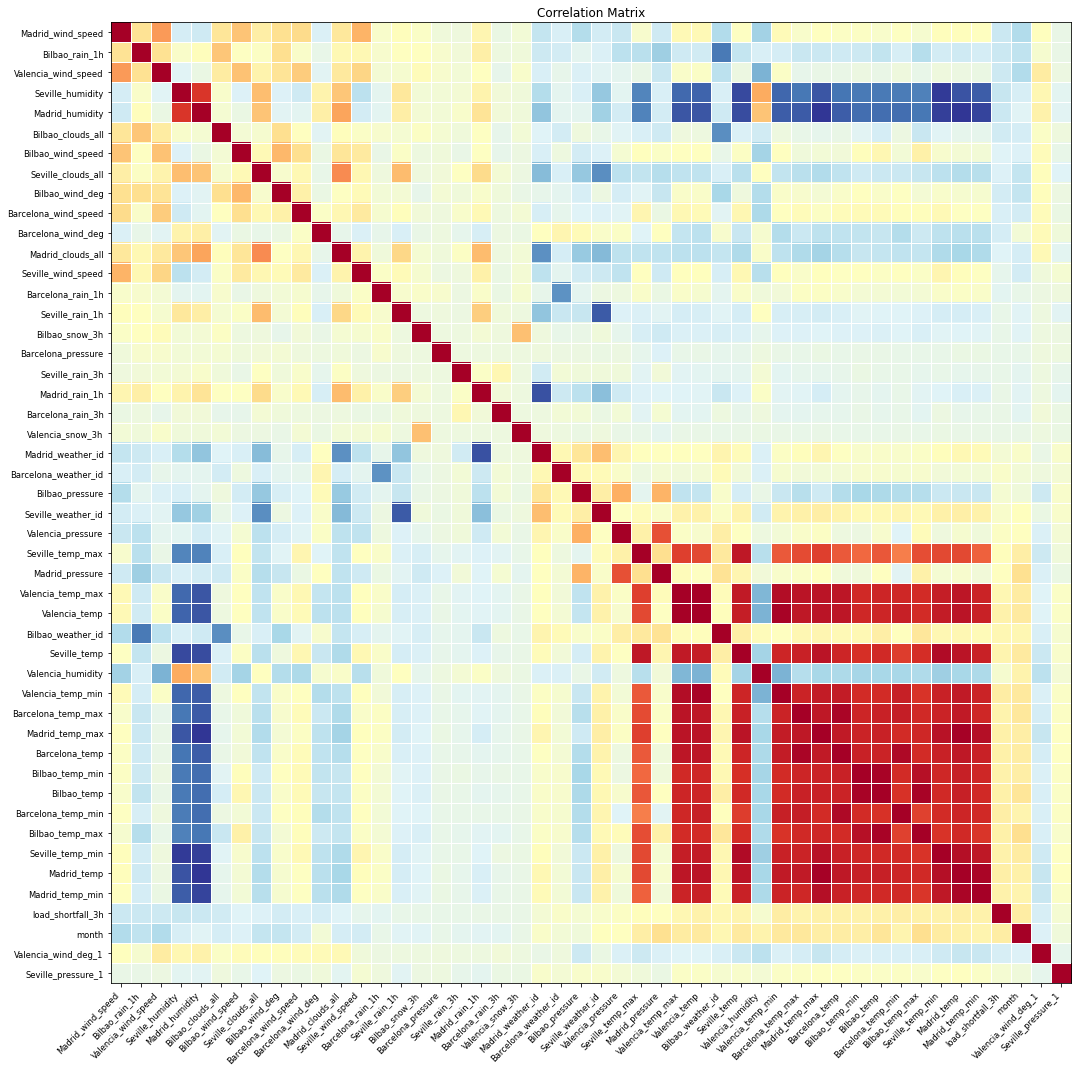

In [277]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

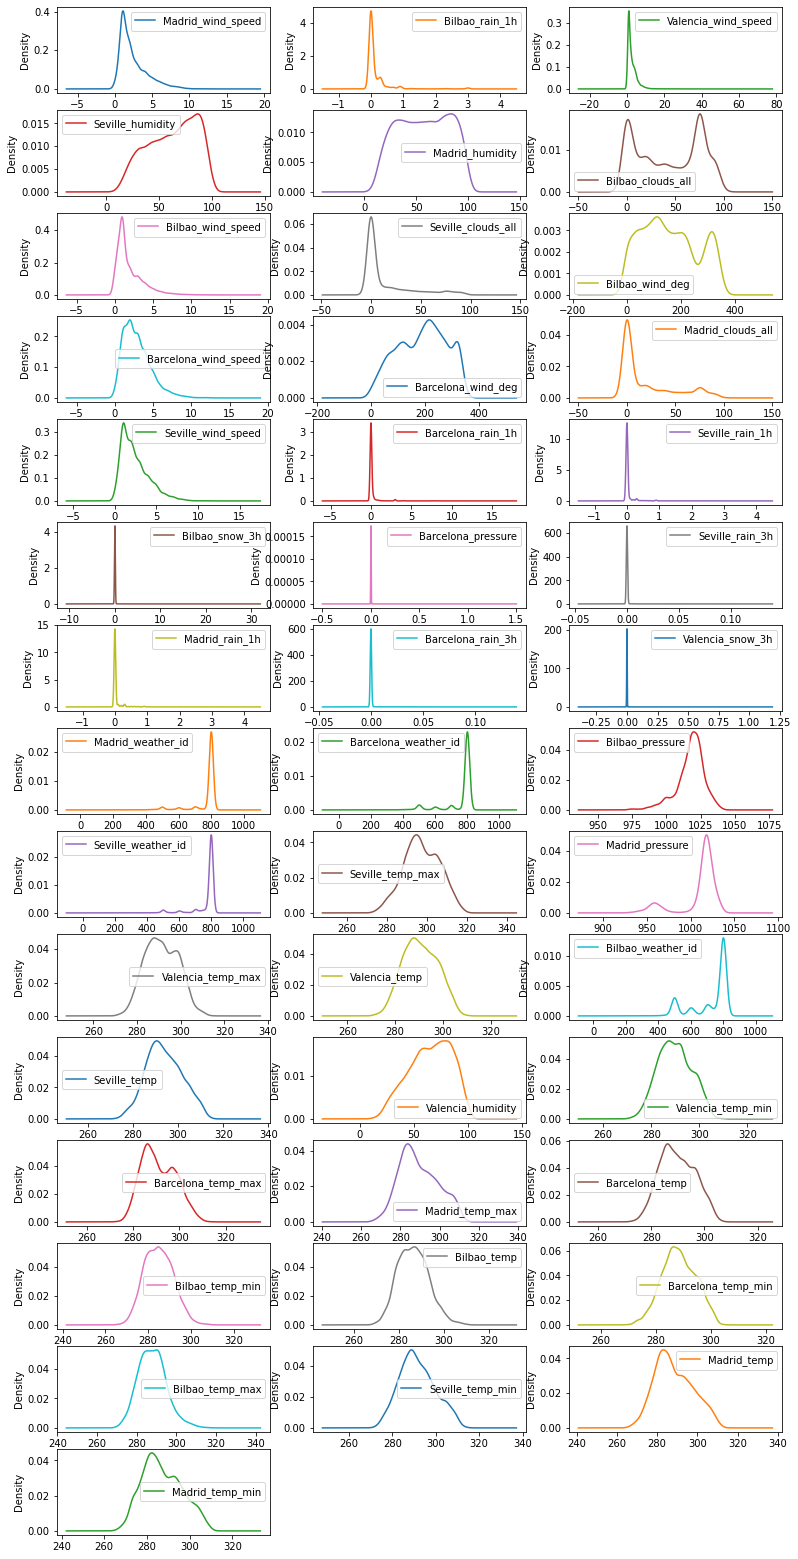

In [278]:
# have a look at feature distributions
features = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min']
df[features].plot(kind='density', subplots=True, layout=(16, 3), sharex=False, figsize=(13, 30));

In [279]:
group_temp = df[['Madrid_temp','Madrid_temp_min','Madrid_temp_max']]
group_temp.head()

,Madrid_temp,Madrid_temp_min,Madrid_temp_max
time,,,
2015-01-01 03:00:00,265.938000,265.938000,265.938000
2015-01-01 06:00:00,266.386667,266.386667,266.386667
2015-01-01 09:00:00,272.708667,272.708667,272.708667
2015-01-01 12:00:00,281.895219,281.895219,281.895219
2015-01-01 15:00:00,280.678437,280.678437,280.678437


The Temperature for different cities are similar for min and max to the actual Temperature values hence we will drop temp_min and temp_max for each city.

<a id="four"></a>
## 4. Data Engineering

Dropping Temp_min and max as explained.

In [280]:
df.drop(columns = ['Valencia_wind_deg', 'Seville_pressure','Madrid_temp_min','Seville_temp_min', 'Bilbao_temp_max', 'Barcelona_temp_min', 'Valencia_temp_max', 'Seville_temp_max','Bilbao_temp_min', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max'], inplace = True)
df_test.drop(columns = ['Valencia_wind_deg', 'Seville_pressure','Madrid_temp_min','Seville_temp_min', 'Bilbao_temp_max', 'Barcelona_temp_min', 'Valencia_temp_max', 'Seville_temp_max','Bilbao_temp_min', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max'], inplace = True)

Split dataset into Dependent and independent variables
We are to split the dataset into dependent (Y) and independent variables (X).

In [281]:
y = df['load_shortfall_3h']
X = df.drop(['load_shortfall_3h'], axis=1)


X_scaled = StandardScaler().fit_transform(X)
X_scaled_test = StandardScaler().fit_transform(df_test)

<a id="five"></a>
## 5. Modelling

We are spliting our X and y into Training and Testing sets.

In [282]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=42,
                                                    shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6134, 37), (2629, 37), (6134,), (2629,))

### Train Model
After data preparation, we are now creating and training the model using Scikit-learn. We import the different regression model from skicit-learn, instantiate the model, and fitthe model on the training data. We set the random state for reproducible results.


### Lasso Regression

In [283]:
# create one or more ML models
# Import LASSO module

# Create LASSO model object
lasso = Lasso(alpha=1)

# Train the LASSO model
lasso.fit(X_train, y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

### Ridge Regression

In [284]:
# Import Ridge regression model

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Random Forest Regressor

In [285]:
#import Random Forest Regressor

RF = RandomForestRegressor(n_estimators=30, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Decision Tree

In [286]:
#import decision tree regressor


# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=42)
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### Evaluating Models i.e Making Predictions on the Test Set: 

Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers.


In [287]:
# evaluate one or more ML models

# Make training set predictions for each model
train_lasso = lasso.predict(X_train)
test_lasso = lasso.predict(X_test)

train_ridge = ridge.predict(X_train)
test_ridge = ridge.predict(X_test)

train_forest = RF.predict(X_train)
test_forest = RF.predict(X_test)


train_tree = regr_tree.predict(X_train)
test_tree = regr_tree.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>



Comparing Model Performance: The Model is tested using and Error metrics which  enables us to track the efficiency and accuracy. The metrics we are using is called the Root Mean Squared Error (RMSE). The RMSE measures the average magnitude of the prediction error.

The formula of the n *RMSE* which is simply the square root of the *MSE* is written below:


\begin{align}
RMSE & = \sqrt{MSE} \\
     & = \sqrt{\frac{1}{N}\sum^{N} (\hat{y_i} - y_i)^{2}}
\end{align}

Where $y_i$ are the actual target values for a dataset with $N$ datapoints, and $\hat{y_i}$ represent our corresponding predictions. RMSE is a more intuitive metric to use than MSE because it is in the same units as the underlying variable being predicted.

All the Regression Model's will be tested using the RMSE: 

In [288]:
# Compare model performance


# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso, squared=False), 
                        "RIDGE": metrics.mean_squared_error(y_train, train_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_train, train_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_train, train_tree, squared=False)
                    },
                    'Test RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso, squared=False),
                        "RIDGE": metrics.mean_squared_error(y_test, test_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_test, test_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_test, test_tree, squared=False)
                    }
                }

### Results of all the models
The results of the models are summarized and shown with regards to the Training and Testing RMSE.

In [289]:
# Create dataframe from the dictionary of all the RMSE results
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE
LASSO,4870.235157,4973.314324
RIDGE,4870.220382,4973.233831
FOREST,4453.031287,5095.321926
D_TREE,4820.325078,5161.304254


In [290]:
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)

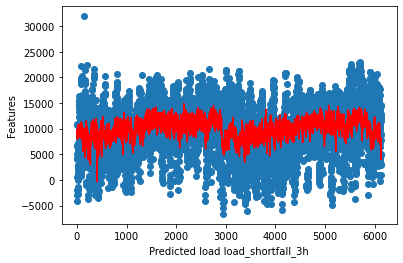

In [291]:
# plot the results
plt.scatter(X_train, y_train)  # plot the original data
plt.plot(X_train, train_ridge, color='red')  # plot the line connecting the generated y-values
plt.ylabel("Features")
plt.xlabel("Predicted load load_shortfall_3h")
plt.show()

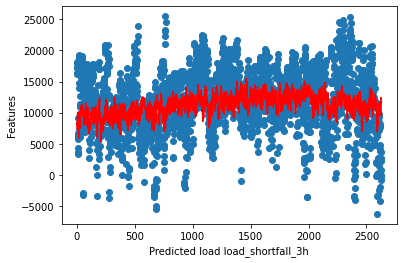

In [292]:
# plot the results
plt.scatter(X_test, y_test)  # plot the original data
plt.plot(X_test, test_ridge, color='red')  # plot the line connecting the generated y-values
plt.ylabel("Features")
plt.xlabel("Predicted load load_shortfall_3h")
plt.show()

Clearly the Ridge performed a lot better than in trying to predict.

Considering the Test Root Mean Squared Error is lowest for the Ridge Regression model, it makes the most sense that this model should be used in our shortfall predictions on unseen data. 


#### PICKLING and Submission


In [ ]:
model_save_path = "modelv3.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge,file)

In [ ]:
predictions = ridge.predict(X_scaled_test)
submission = pd.DataFrame({'time':df_test.index,'load_shortfall_3h':predictions})
submission = submission.set_index('time')
submission.to_csv('submission.csv',index=True)
submission

<a id="seven"></a>
## 7. Model Explanations
Explanation of Our chosen Model


# Here’s a little insight into our thinking process…
Real world problem solving is complex. There are multiple contributing factors that are correlated. Think of them as pros and cons to every solutions factor. This is known as Multicollinearity

Multicollinearity can create inaccurate estimates and inflate standard errors. As we began creating our models, we searched for a low Root Mean Squared Error, otherwise known as RMSE. RMSE is used to measure the difference between predicted and actual values. It gives us a measure of “how far off were we?” Once we had tested our models we noticed that Ridge model gave us the lowest RMSE. Ridge regression allows us to differentiate “important” from “less-important” contributors in the model thus allowing us to fight the impact of Multicollinearity. Furthermore it adds just enough bias to make the estimates reliable compared to true values. Another goal we pursued was attaining a model that would generalise the pattern , and work well on test data too. We rejected models that would Overfit the data. “Overfitting” occurs when the trained model works well on the training data but poor on the testing data. Ridge regression prevents overfitting.

In trying to explain how our ridge regression model works, it is important to note that certain predictor variables are more important than others regarding predictive capability. As a result, variables may either be dropped altogether, or may be weighted according to how much they contribute to a prediction. The ridge regression model works to minimise the impact of low-predictive ability variables by scaling them using a penalty function. That penalty function or 'term', as its known, is applied to each term and allows shrinkage of the effect of variables with high variance. Additionally, our model does suffer from issues of multicollinearity, meaning that variables are autocorrelated to each other. This poses an issue to regression modelling. Fortunately, due to its ability to shrink the effect of predictors, ridge regression is able help mitigate any multicollinearity issues we have faced. 

#### Summary
* The Problem and Solution
* Key Findings
* The value of the chosen model